### Imports

In [24]:
from mlp import train, Dense, predict_with_layer_value
from activation_functions import Sigmoid
from mse import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix, get_config_params, add_noise_to_dataset, compare_matrixes
from plots import plot_bitmap_matrix_2, plot_bitmap_matrix_with_noise
from data.font import fontDict
import numpy as np

### Config params

In [4]:
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation = get_config_params('./denoising_ae.json')

In [3]:
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
dataset = np.reshape(bitmapList,(len(bitmapList), 35, 1))

### 35-20-10-2-10-20-35

In [5]:
# El espacio latente es la salida de la "capa 6"
autoencoder = [
    Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
]

### Training

In [6]:
# Normal training
error = train(autoencoder, mse, mse_derivative, dataset, dataset, epochs=max_epochs, verbose=False)

# Training with noise
noise_level = 0.1
for i in range(10):
    noisy_dataset = add_noise_to_dataset(dataset, noise_level)
    error = train(autoencoder, mse, mse_derivative, noisy_dataset, dataset, epochs=max_epochs, verbose=False)

### Original vs Noisy vs Predicted

Correct Predictions:  27
Accuracy:  0.84375


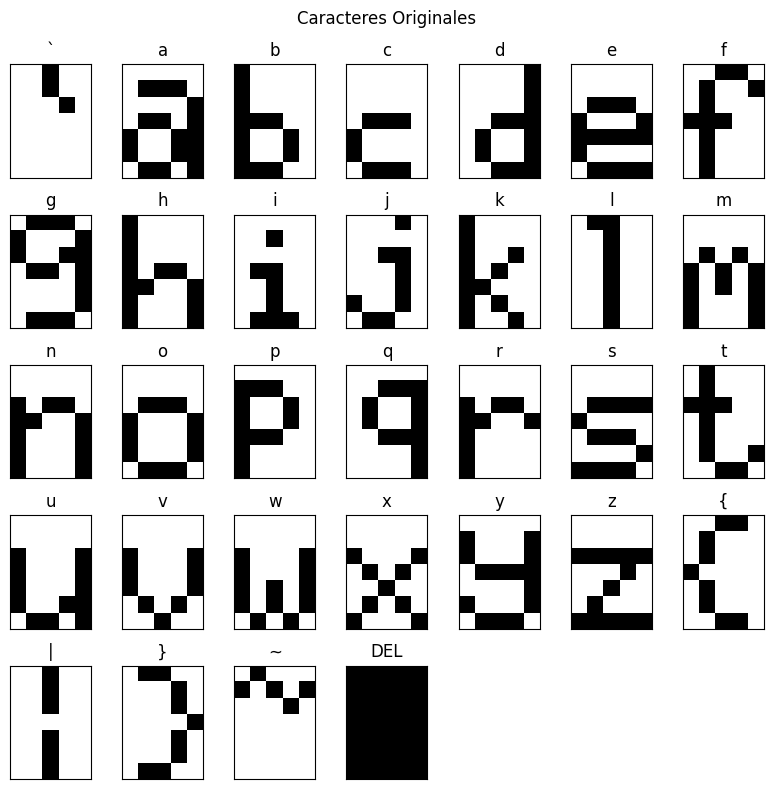

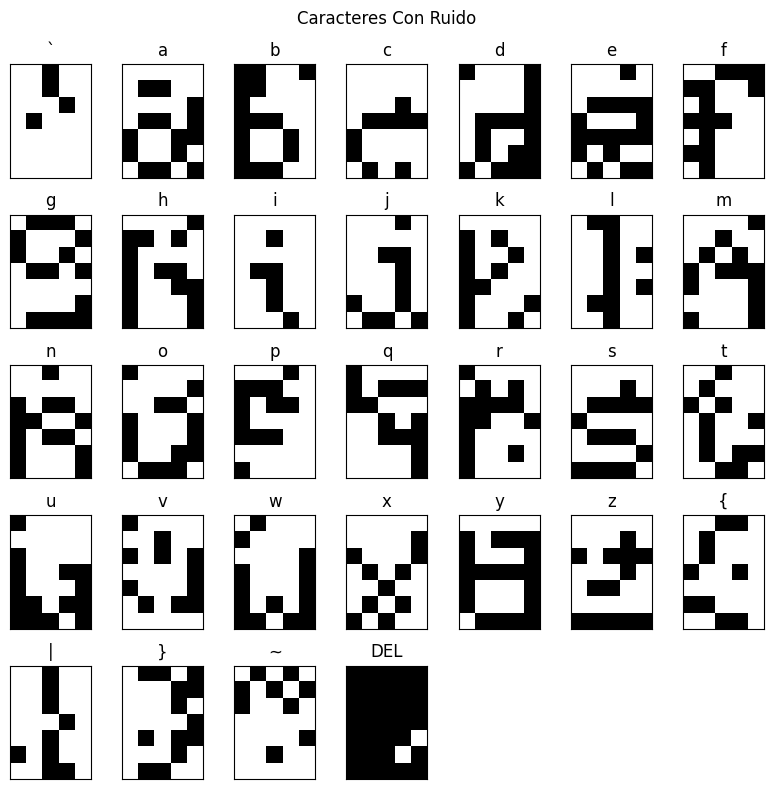

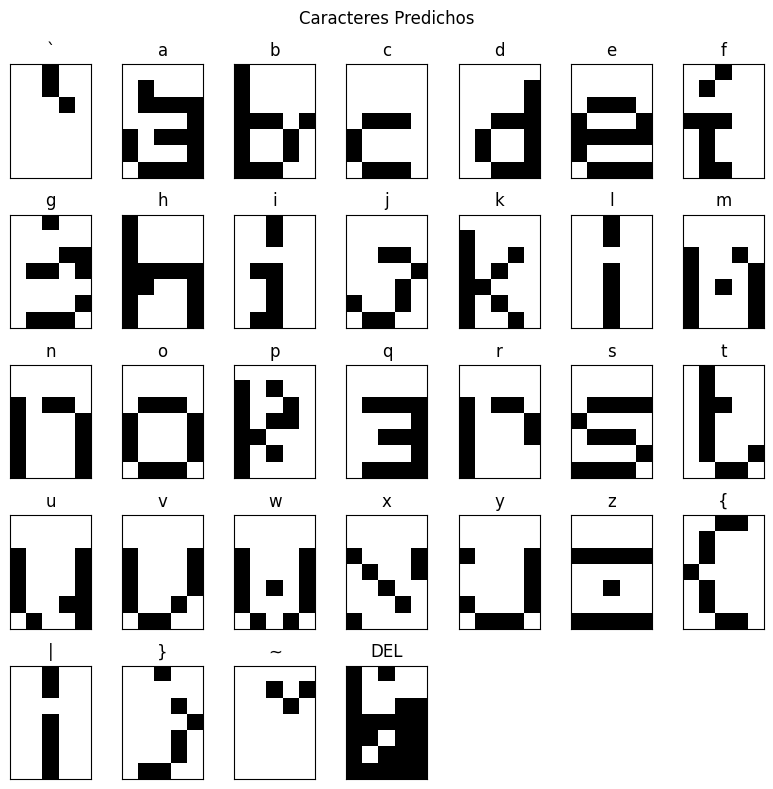

In [23]:
characters = list(bitmapDict.keys())

input_matrix_list = []
output_matrix_list = []
noisy_matrix_list = []

correct_predictions = 0

for c in range(len(characters)):
    input_bitmap = []
    noisy_bitmap = []
    output_bitmap = []

    # dataset es una lista de listas de -listas con un solo elemento-
    for i in range(len(dataset[c])):
        input_bitmap.append(dataset[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)
    input_matrix_list.append(input_bitmap_matrix)

    for i in range(len(noisy_dataset[c])):
        noisy_bitmap.append(noisy_dataset[c][i][0])
    noisy_bitmap_matrix = bitmap_as_matrix(noisy_bitmap) 
    noisy_matrix_list.append(noisy_bitmap_matrix)   


    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, noisy_dataset[c], 6)


    for output in outputs:
        output_bitmap.append(round(abs(output[0])))
    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)
    output_matrix_list.append(output_bitmap_matrix)


    if compare_matrixes(input_bitmap_matrix, output_bitmap_matrix) > 30: # 30 pixeles iguales de 35
        correct_predictions += 1

    # plot_bitmap_matrix_with_noise(input_bitmap_matrix, noisy_bitmap_matrix, output_bitmap_matrix, characters[c])

print("Correct Predictions: ", correct_predictions)
print("Accuracy: ", correct_predictions / len(characters))

plot_bitmap_matrix_2(input_matrix_list, characters, "Caracteres Originales")
plot_bitmap_matrix_2(noisy_matrix_list, characters, "Caracteres Con Ruido")
plot_bitmap_matrix_2(output_matrix_list, characters, "Caracteres Predichos")